In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("datasets/sp1.csv")

In [3]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
X = dataset.drop(columns=["isFlaggedFraud", "nameOrig", "nameDest", "isFraud"])
Y = dataset["isFraud"]

# replace text to int
encoder = LabelEncoder()
X["type"] = encoder.fit_transform(X["type"])

In [5]:
model = DecisionTreeClassifier()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
#train model
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [7]:
predictions = model.predict(X_test)

In [8]:
score = accuracy_score(predictions, Y_test)

In [9]:
score

0.9996911649603465

Text(0.5, 1.0, 'Fraudulent vs. Non-Fraudulent Transaction Ratio')

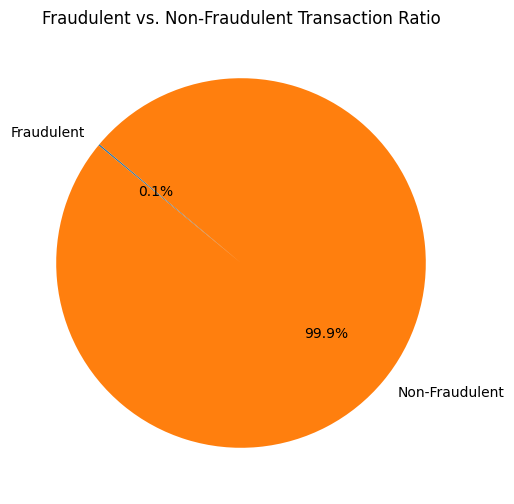

In [10]:
non_fraudulent_count = dataset["isFraud"].value_counts()[0]
fraudulent_count = dataset["isFraud"].value_counts()[1]

fraud_ratio = fraudulent_count / (fraudulent_count + non_fraudulent_count)
non_fraud_ratio = non_fraudulent_count / (fraudulent_count + non_fraudulent_count)

labels = ['Fraudulent', 'Non-Fraudulent']
sizes = [fraud_ratio, non_fraud_ratio]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Fraudulent vs. Non-Fraudulent Transaction Ratio')

Text(0.5, 1.0, 'Operations by Type')

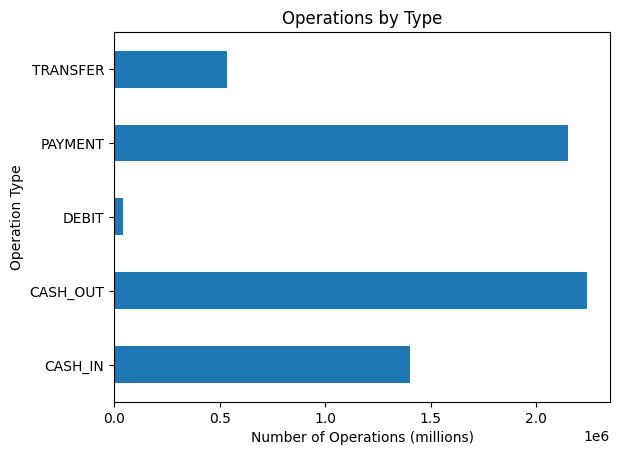

In [11]:
dataset.groupby("type").size().plot(kind='barh')
plt.xlabel("Number of Operations (millions)")
plt.ylabel("Operation Type")
plt.title("Operations by Type")